In [17]:
%%html
<style>
@font-face {
    font-family: BNazanin;
    src: url(B-NAZANIN.TTF);
}
.myStyle{
    font-family:BNazanin;
    text-align: right;
    text-size: 20px;
}
</style>



# Facial Expression Recognotion

## Abstract

<div class = "myStyle", dir = "rtl">
در این پروژه به پیاده‌سازی یک شبکه نورونی و  train کردن یک مدل بر اساس آن، برای تشخیص احساسات صورت افراد پرداخته میشود. در ابتدا باید دیتاسِت مورد نظر را پیدا کنیم یا بسازیم.
</div>

<div class = "myStyle", dir = "rtl">
بعد از تهیه‌ی دیتاسِت، نیاز است با توجه به label عکس‌ها (مشخصه‌ای که باعث تمایز بین عکس‌ها و منجر به گروه‌بندی‌های مورد نظر میشود) عکس‌ها را در کتگوری‌های مختلف قرار دهیم. به این فرایندهای اولیه که به آماده سازی دیتاسِت برای ترِین شدن می‌انجامد، پردازش‌های اولیه (Preprocessing) گویند.
</div>

<div class = "myStyle", dir = "rtl">
بعد از پردازش‌های اولیه نوبت به
</div>

## 1. Dataset

<div class = "myStyle", dir = "rtl">
<a href="https://www.kaggle.com/">kaggle.com</a>
</div>
<div class = "myStyle", dir = "rtl">
در سایت بالا دیتا‌ست‌های زیادی برای مسئله‌های متفاوت تهیه و جمع‌آوری شده است. دیتاست مورد نیاز ما در آدرس زیر است:
</div>

<div class = "myStyle", dir = "rtl">
<a href="https://www.kaggle.com/debanga/facial-expression-recognition-challenge">Dataset</a>
</div>

<div class = "myStyle", dir = "rtl">
بعد از دانلود
    dataset
    مورد نظر، یک فایل شامل اطلاعات بیش از ۳۰۰۰۰ عکس با 
    label
    های مختلف در فرمت
    csv
    خواهیم داشت.
    <br>
    میتوانیم به شکل زیر به اطلاعات این فایل دسترسی داشت:
</div>

In [9]:
# import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# get the data
filname = 'data.csv'
label_map = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
names=['label','image','emotion']
df=pd.read_csv('data.csv',names=names, na_filter=False)
im=df['image']
df.head(10)

,label,image,emotion
0,label,image,emotion
1,4,59 71 89 118 139 160 183 222 212 148 77 16 16 ...,Sad
2,0,144 149 129 114 119 124 125 135 145 141 147 15...,Angry
3,4,90 97 105 42 41 41 37 40 36 55 104 128 145 162...,Sad
4,1,69 72 80 87 95 102 112 123 131 137 143 151 159...,Disgust
5,0,134 135 136 137 142 122 46 47 36 25 21 18 13 1...,Angry
6,2,255 180 67 77 62 45 33 42 47 54 59 67 80 97 10...,Fear
7,5,203 242 239 237 233 219 161 72 71 97 115 123 1...,Surprise
8,0,104 105 106 106 106 104 104 111 136 159 156 16...,Angry
9,4,219 221 222 224 225 226 227 229 230 231 233 23...,Sad


<div class = "myStyle", dir = "rtl">
همانطور که در جدول بالا دیده میشود، این 
dataset
علاوه بر عکس‌ها، شامل label‌ ها نیز میشود.
<br>
این 
    label
    ها، شامل ۷ حس زیر میباشند:
    <br>
    1. Agnry
    <br>
    2. Disgust
    <br>
    3. Fear
    <br>
    4. Happy
    <br>
    5. Sad
    <br>
    6. Surprise
    <br>
    7. Neutral
<div>

## 2. Preprocessing

<div class = "myStyle", dir = "rtl">
در ادامه نیاز است عکس‌ها را از
    label
    ها جدا کنیم. برای اینکار به صورت زیر عمل میکنیم:
        
<div>

In [10]:
def getData(filname):
    # images are 48x48
    # N = 35882
    Y = []
    X = []
    first = True
    for line in open(filname):
        if first:
            first = False
        else:
            row = line.split(',')
            
            Y.append(int(row[0]))
            X.append([int(p) for p in row[1].split()])

    X, Y = np.array(X) / 255.0, np.array(Y)
    return X, Y

<div class = "myStyle", dir = "rtl">
    تابع بالا، فایل با فرمت 
    csv
    را میگیرد و عکس‌ها و
    label
    ها را به ترتیب در آرایه‌های
    X
    و
    Y
    میریزد.
<div>

In [11]:
X, Y = getData(filname)

In [13]:
num_class = len(set(Y))
print('number of categories = ' + str(num_class))

N, D = X.shape
print('number of pictures = ' + str(N))
print('pictures\' shape = ' + str(D))



number of categories = 7
number of pictures = 35882
pictures' shape = 2304


<div class = "myStyle", dir = "rtl">
عکس‌های سیاه، سفید را میتوان آرایه‌ای دو بعدی از پیکسل‌ها در نظر گرفت. عکس‌های این 
dateset
    ، عکسهایی سیاه، سفید در اندازه‌ی ۴۸ پیکسل در ۴۸ پیکسل هستند.
<br>
اما بعد از استخراج این عکس‌ها، همانطور که در بالا میبینیم، ابعاد آنها نه ۴۸ پیکسل در ۴۸ پیکسل، بلکه ۲۳۰۴ پیکسل در ۱ پیکسل است. به عبارتی در آرایه‌ی 
    X
    عکس‌ها یک بعدی هستند و نه دو بعدی.
<br>
    برای حل این مشکل، نیاز است عملیات
    reshape
    را انجام دهیم.
    بعد از اجرای کد پایین داریم:
<div>

In [14]:
X = X.reshape(N, 48, 48, 1)
print(X.shape)


(35882, 48, 48, 1)


<div class = "myStyle", dir = "rtl">
    در اینجا، عدد اول بیانگر تعداد عکس‌ها، عدد بیانگر دوم و سوم طول و عرض عکس‌ها به پیکسل و عدد آخر نیز بیانگر اندازه‌ی بعد سوم است. بعد سوم بعد رنگ است که عدد ۱ در اینجا یعنی عکس‌ها سیاه و سفید هستند..
<div>

<div class = "myStyle", dir = "rtl">
در ادامه‌ی فرایند 
preprocessing
باید مجموعه‌های
    Train set
    و
    Test set
    را تعیین کنیم.
    <br>
    مجموعه‌ی
    Train set
    مجموعه‌ای است که مدل با توجه به عکس‌های این مجموعه و 
    label
    های آن، 
    Train
    میشود.
    <br>
    مجموعه‌ی
    Test set
    مجموعه‌ای است که مدل 
    Train
    شده روی آن تست میشود که مشخص شود دقت یادگیری تا چه اندازه است.
<div>

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
y_train = (np.arange(num_class) == y_train[:, None]).astype(np.float32)
y_test = (np.arange(num_class) == y_test[:, None]).astype(np.float32)

## 3. Convolutional Neural Network (CNN)

<div class = "myStyle", dir = "rtl">
در اینجا به طراحی معماری شبکه‌ی نورونی میبپردازیم.
اما قبل از آن ببینیم شبکه‌ی نورونی چگونه کار میکند.
<div>

### What are Neural Networks?

#### Perceptron

<div class = "myStyle", dir = "rtl">
    پرسپترون‌ها را میتوان نورون‌های مصنوعی در نظر گرفت.
    در مغز جانداران، این نورون‌ها هستند که افکار و احساسات و درک و فهم محیط از را میسازند. ساختمان نورون‌های در زیر دیده میشود. در نورون‌ها عصب‌هایی وجود دارد که به هسته‌ی نورون متصل شده‌اند و در قالب ورودی‌های تابع کار میکنند. ابن عصب‌ها ورودی‌هایی را گرفته و به هسته میدهند، و هسته با توجه به این ورودی‌ها خروجی مناسب را تولید میکند.
<div>

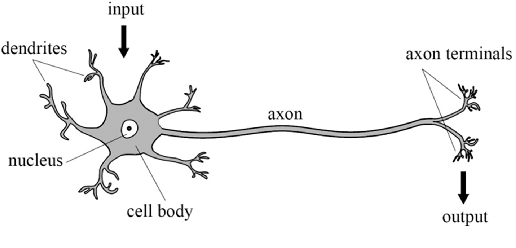

<div class = "myStyle", dir = "rtl">
بنابراین میتوان نورون‌ها را توابعی در نظر گرفت که بر اساس ورودی‌ها، خروجی‌های مناسب را میسازند.
<br>
در علم کامپیوتر و بادگیری ماشین، با تقلید از ساختمان نورون‌ها، پرسپترون‌ها را میسازند.
ساختمان یک پرسپترون را در شکل زیر میبینیم.
<div>

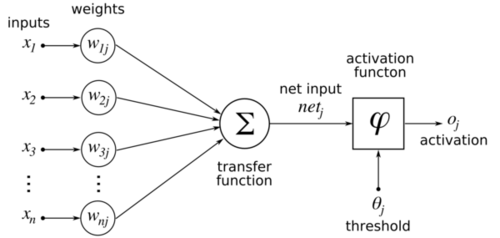

<div class = "myStyle", dir = "rtl">
هر ورودی یک وزن مربوط به خود را دارد. ورودی‌ها در هر یک از این وزن‌ها ضرب میشوند و ورودی 
activation function
را میسازند.
<br>
    activation function
    چیست؟
    
<br>
    تابع فعالیت یا 
    activation function
    حکم هسته‌ی نورون را دارد که بر اساس ورودی‌های که به آن وارد میشود، خروجی مناسب را میسازد.
    برای این تابع انتخاب‌های زیادی داریم. به عنوان مثال میتوان از تابع پله استفاده کرد، به این صورت که اگر مجموع ورودی‌ها مثبت بود، خروجی ۱ شود و در غیر این صورت صفر بماند.
    در این حالت که
    activatin function 
    یک تابع ساده به این صورت است، در خروجی به یک معادله خط میرسیم.
<div>
    
    
    

$inp\text{ut}_{0}\,\times weight_{0}\,+\,\text{inpu}\text{t}_{1}\times weight_{1}\,+\,...\,+\,\text{input}_{n}\times weight_{n}$

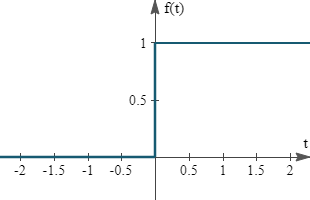

<div class = "myStyle", dir = "rtl">
اینگونه 
activation function
ها برای مسائل ساده‌ای مثل تشخیص جنسیت افراد بر اساس قد و وزن، یا پیشبینی قیمت خانه بر اساس متراژ و تعداد اتاق خواب‌ها موثر است.
<br>
    همانطور که در شکل زیر میبینیم، خطی که در وسط رسم شده با دقت نسبتا خوبی، توانسته باعث تشخیص جنسیت افراد شود.
<div>

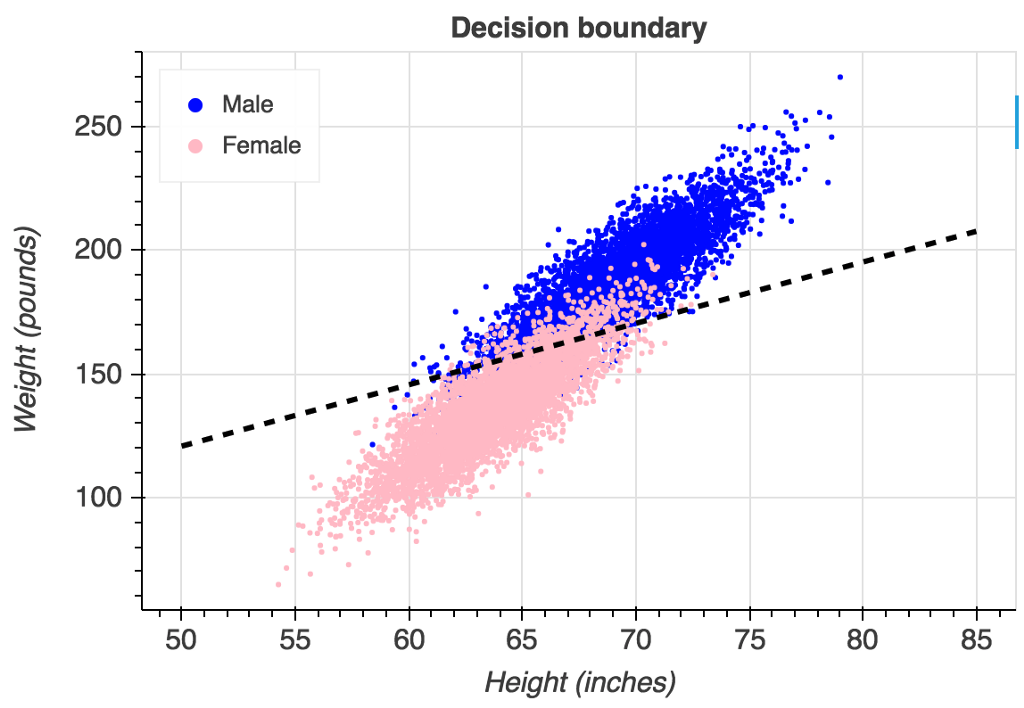

<div class = "myStyle", dir = "rtl">
 اگر مسئله پیچیده‌تر شود، برای مثال مسئله‌ای شکل زیر را بسازد، دیگر نمیتوانیم با معادله‌ی خط، داده‌ها را از هم تفکیک کنیم.در این حالت نیاز به 
    activation function پیچیده‌تری است.
<div>

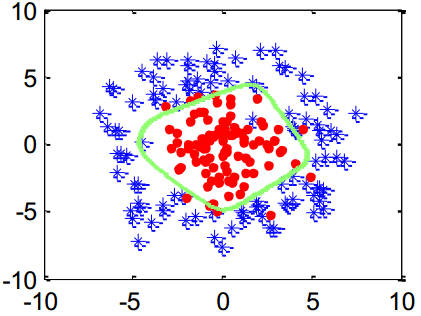

<div class = "myStyle", dir = "rtl">
جلوتر میبینیم که در فرایند 
    backpropagation
    نیاز است از
    activation funvtion
    ها مشتق بگیریم.
    تا اینجای کار با تابع پله به عنوان یک 
    activation function
    آشنا شدیم. این تابع مشکلاتی دارد. از جمله‌ی آنها:
    <br>
    ۱. تغییرات کوچک منعکس نمیشود
    <br>
    ۲. مشتق در تمام تقاط این تابع صفر است
    <br>
    <br>
    نزدیک‌ترین تابع به تابع پله، برای اینکه تابع مشتق پذیر باشد و مشتق غیر صفر داشته باشد، تابع 
    sigmoid
    است.
<div>

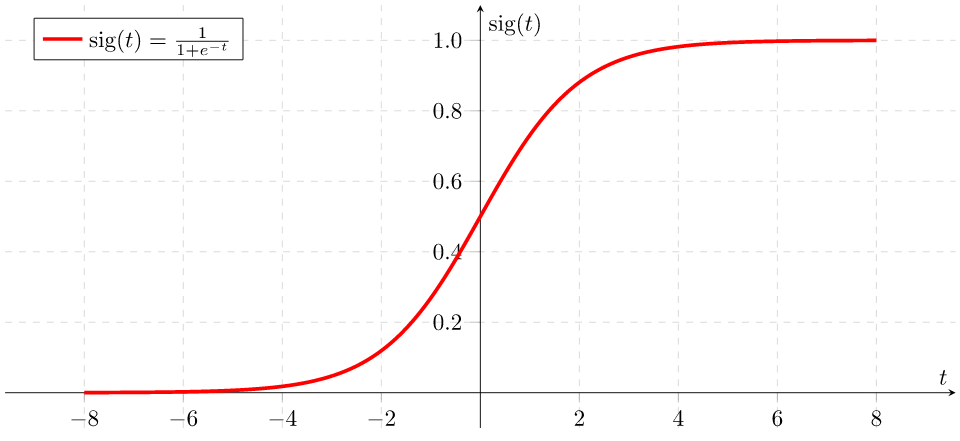

<div class = "myStyle", dir = "rtl">
این تابع نیز مشکلاتی دارد، از جمله‌ی آنها این است که همچنان مشتق تابع در نقاط
saturate
شونده صفر است.
از اینرو امروزه در اکثر مواقع از تابعی به اسم 
ReLU
استفاده میشود که دیگر مشکلات توابع قبلی را ندارد.
    نمودار این تابع به شکل زیر است:
<div>

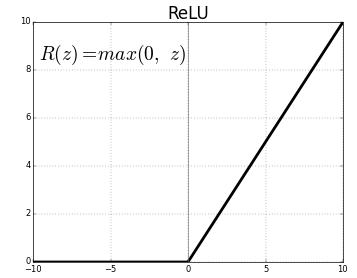

<div class = "myStyle", dir = "rtl">
در شبکه عصبی‌های کلاسیک که از تابع 
relu
به عنوان 
activation function
استفاده نمیکردند، نمیتوانستیم تعداد زیادی 
hidden layer
داشته باشیم. دلیل این مسيله این بود که در عملیات 
backpropagation
مشتق 
activation function
هر لایه در لایه‌ی دیگر ضرب میشود. همانطور که دیدیم، توابعی مثل تابع 
sigmoid
به ازای x های بزرگ saturate میشوند. و این مشکل باعث میشود مشتق این توابع در این نقاط به صفر نزدیک شود و ضرب این اعداد نزدیک به صفر خود باعث کوچکتر شدن جواب نهایی میشود و از بهینه شدن شبکه جلوگیری میکند و شبکه هیچگاه جواب نخواهد داد.
<div>

### Neural Network

<div class = "myStyle", dir = "rtl">
در شکل زیر، تصویر یک شبکه‌ی عصبی را داریم.
همانطور که میبینیم هر شبکه‌ی عصبی از سه لایه‌ی وزودی، پنهان و خروجی تشکیل شده.

<div>

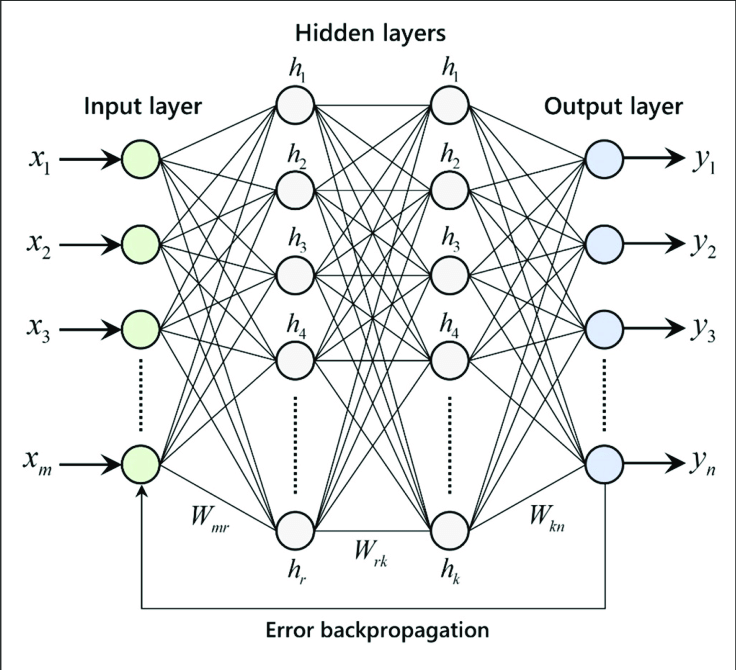

### cost fucntion

<div class = "myStyle", dir = "rtl">
در ابتدای کار شبکه، وزن مربوط به هر پرسپترون به صورت تصادفی مقداردهی میشود. در طول فرایند 
    Train
    شدن مدل، این وزن‌ها هستند که تغییر میکنند تا خروجی مدل خروجی مطلوب شود.
    <br>
    اما نیاز است این وزن‌ها طبق معیاری تغییر کنند. این معیار همان 
    cost function
    است. به عبارتی این تابع، بد بودن شبکه را میسنجد.
    <br>
    گام بعدی پس از انتخاب تابع هزینه، یادگیری است. با توجه به بد بودن شبکه، وزن‌هایی که قبلا به صورت تصادفی مقداردهی شدند را در جهت بهبود شبکه تغییر میدهیم. از اونجایی که 
    cost function
    تابعی از
    weightها و 
    biasها است.
    بنابراین با توجه به مبحث بهینه‌سازی، اگز از cost function
    مشتق بگیریم، optimum
    آن تابع بدست می‌آید. ما در مرحله‌ی یادگیری بدنبال نقطه‌ای هستیم که 
    cost function
    در آن کمترین مقدار را داشته باشد. بنابراین باید دنبال اکسترمم مینیمم باشیم.
    <br>
    چون در اکثر مسائل، تعداد ورودی‌ها و به همون نسبت، تعداد وزن‌ها زیاد است، بدست آوردن اکسترمم کار راحتی نیست. به همین دلیل از
    cost function
    بر حسب وزن‌های مختلف مشتق جزئی میگیریم تا جهت و اندازه‌ی شیب را در هر نقطه به ما بدهد. بعد از آن بر خلاف جفت شیب، وزن مربوطه را بروز میکنیم و آنقدر این فرایند را ادامه میدهیم تا به اکسترمم برسیم.
    به این فرایند برخلاف شیب حرکت کردن، گرادیان کاهشی یا
    Gradient Descent
    میگویند.
<div>

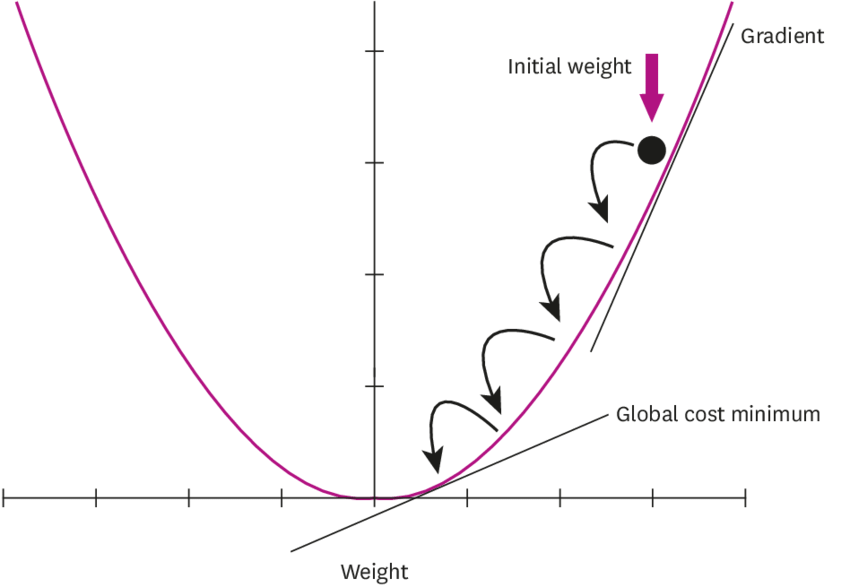

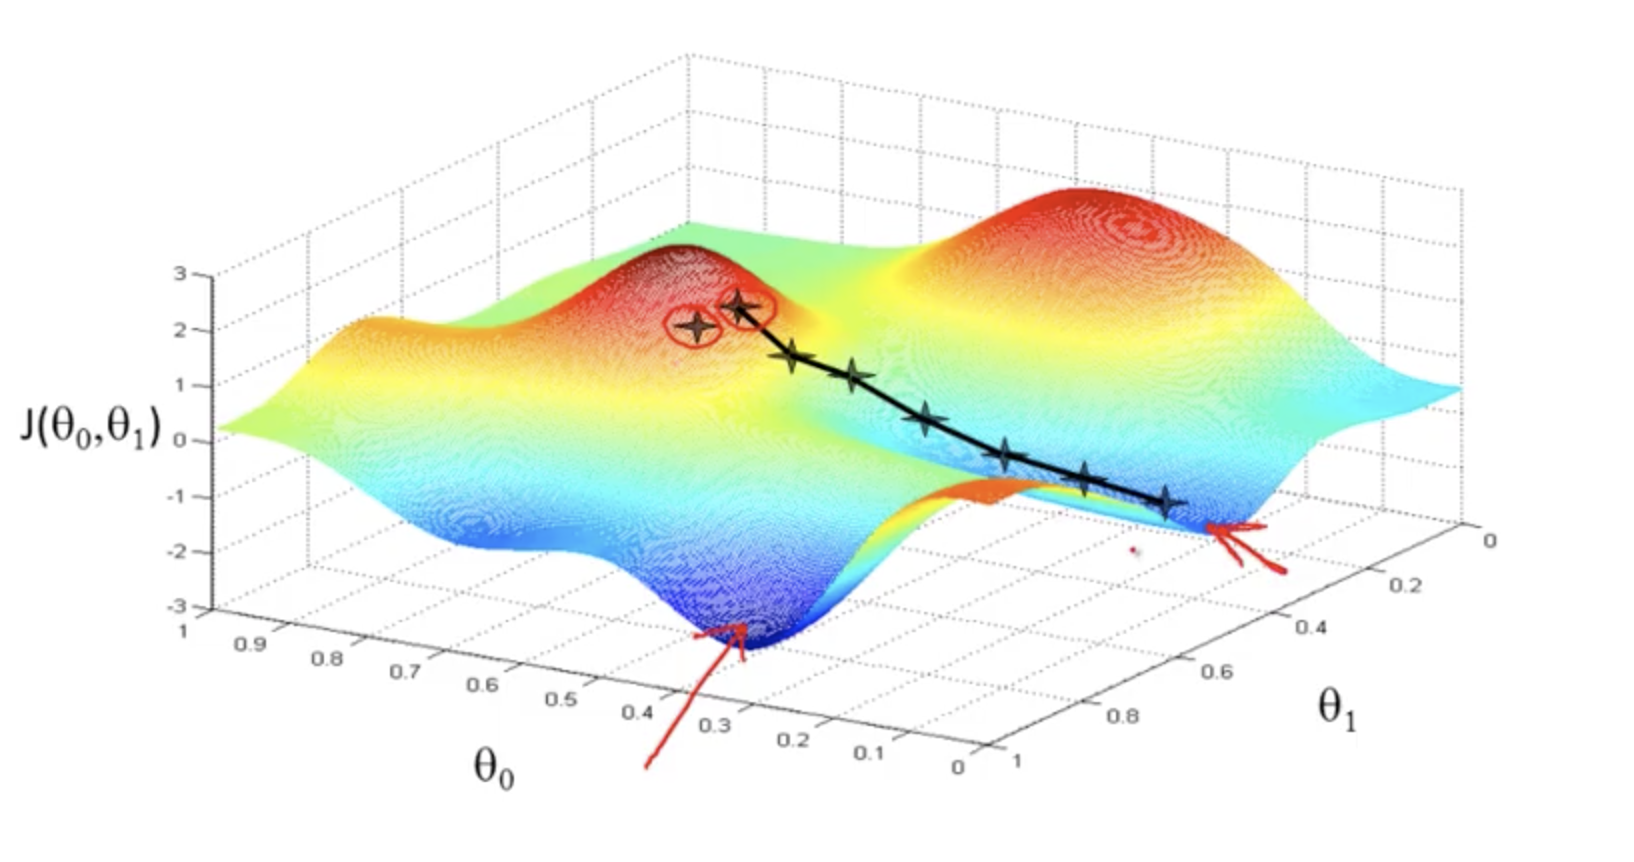

<div class = "myStyle", dir = "rtl">
آنچه گفتیم توضیح خلاصه‌ای بود از چگونگی کار کردن یک شبکه‌ی نورونی.
    در جلوتر به پیاده سازی شبکه‌ی نورونی کانوولوشنی مربوط به این مسئله میپردازیم.
<div>

## 4. Network Implementation

<div class = "myStyle", dir = "rtl">
در این قسمت به پیاده سازی شبکه‌ی مورد نظر میپردازیم.
در اکثر مواقع، برای گرفتن بهترین نتیجه، باید با آزمون و خطا در معماری تغییرات بوجود آورد و آن را بررسی کرد که فرایند وقت‌گیری است.
<div>

In [16]:
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from keras.layers.normalization import BatchNormalization

In [17]:
def my_model():
    model = Sequential()
    input_shape = (48,48,1)
    model.add(Conv2D(64, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
    model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
    model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(7))
    model.add(Activation('softmax'))
    
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')
    # UNCOMMENT THIS TO VIEW THE ARCHITECTURE
    #model.summary()
    
    return model

model=my_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 48, 48, 64)        1664      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 48, 48, 64)        102464    
_________________________________________________________________
batch_normalization_5 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 128)       409728    
_________________________________________________________________
batch_normalization_6 (Batch (None, 24, 24, 128)      

## 5. Training

<div class = "myStyle", dir = "rtl">
در این مرحله بالاخره به فرایند یادگیری میرسیم. در این مرحله  مدل را کامپایل میکنیم و Train set و Test set هایی را که قبل تر مشخص کردیم به مدل میدهیم تا مدل رو آن‌ها یادگیری را انجام دهد.
در این مرحله با تعاریفی مثل learning rate و epoch
آشنا میشویم.
<div>

### Learning Rate

<div class = "myStyle", dir = "rtl">
این متغیر بیانگر اتدازه‌ی قدم‌هایی است که تابع 
optimizer
برای پیدا کردن اکسترمم برمیدارد.
برای مثال فرض کنید چشمان شما بسته است و در بالای کوهی قرار دارید با کمک تکه چوبی میخواهید مسیری با شیب منفی را به سمت دامنه‌ی کوه پیدا کنید.
اندازه‌ی این چوب بیانگر learning rate
شماست. این چوب به شما درک مورد نیازتان از محیط اطراف را میدهد.
<br>
حال اگر این چوب به اندازه‌ی کافی بزرگ نباشد، شما در هر مرحله که چوب را به زمین میزنید، درک کمی از محیط پیدا میکنید. به همین دلیل فرایند پیدا کردن مسیر به سمت دامنه وقت‌گیر خواهد بود.
همچنین ممکن است در طول مسیر به محیط صافی برسید که هر نقطه‌ی دیگر ارتفاع بیشتری نسبت به جایی که ایستاده‌اید داشته باشد، اما با این حال مقصد نهایی نباشد. به عبارتی در محیط به یک اکسترمم نسبی برسید، در حالی که مقصد اکسترمم مطلق است.
<br>
حال اگر تکه چوب بیش از حد بزرگ باشد، ممکن است با هر بار زدن تکه چوب به زمین از قله‌ی دیگری سر دراورید که کاملا فرایند یادگیری محیط را مختل میکند.
<div>

### Batch Size

<div class = "myStyle", dir = "rtl">
در مثال بالا، نیاز بود که چوب را چند بار به زمین بزنیم تا به درک کافی از محیط برای حرکت برسیم.
    <br>
    در فرایند یادگیری نیز مدل تعدادی عکس را میبیند و تا شروع به بهینه سازی کند. این تعداد عکس batch size هستند.
<div>

### Epoch

<div class = "myStyle", dir = "rtl">
این متغیر بیانگر تعداد دفعاتی است که مدل تمام عکس‌های Train Set را بررسی میکند
<div>

In [18]:
path_model='model_filter.h5' # save model at this location after each epoch
K.tensorflow_backend.clear_session() # destroys the current graph and builds a new one
model=my_model() # create the model
K.set_value(model.optimizer.lr,1e-3) # set the learning rate
# fit the model
h=model.fit(x=X_train,     
            y=y_train, 
            batch_size=32, 
            epochs=20, 
            verbose=1, 
            validation_data=(X_test,y_test),
            shuffle=False,
            callbacks=[
                ModelCheckpoint(filepath=path_model),
            ]
            )

Train on 32293 samples, validate on 3589 samples
Epoch 1/20
32293/32293 [==============================] - 50s 2ms/step - loss: 1.7317 - accuracy: 0.3318 - val_loss: 1.4934 - val_accuracy: 0.4179
Epoch 2/20
32293/32293 [==============================] - 45s 1ms/step - loss: 1.2347 - accuracy: 0.5333 - val_loss: 1.1983 - val_accuracy: 0.5472
Epoch 3/20
32293/32293 [==============================] - 47s 1ms/step - loss: 0.9767 - accuracy: 0.6335 - val_loss: 1.0292 - val_accuracy: 0.6166
Epoch 4/20
32293/32293 [==============================] - 47s 1ms/step - loss: 0.7812 - accuracy: 0.7098 - val_loss: 1.0968 - val_accuracy: 0.5993
Epoch 5/20
32293/32293 [==============================] - 47s 1ms/step - loss: 0.5764 - accuracy: 0.7922 - val_loss: 1.0530 - val_accuracy: 0.6450 - ETA: 18s - loss: - ETA: 15s - loss: - ETA: 13 - ETA: 10s - l - ETA - ETA: 3s - los
Epoch 6/20
32293/32293 [==============================] - 47s 1ms/step - loss: 0.3890 - accuracy: 0.8656 - val_loss: 1.2066 - val_a

<div class = "myStyle", dir = "rtl">
بعد از اتمام کامپایل، مدل به دقت یادگیری حدود ۹۰ درصد رسیده است. اما دقت یادگیری برای ما ملاک نیست، ملاک دقت تست است. به نمودار زیر توجه کیند:
<div>

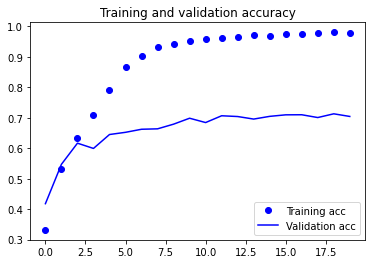

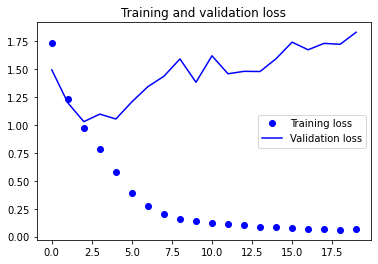

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = h.history['accuracy']
val_acc = h.history['val_accuracy']
loss = h.history['loss']
val_loss = h.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

<div class = "myStyle", dir = "rtl">
همانطور که میبینیم، دقت یادگیری با دقت تست تا ۲۵ درصد تفاوت دارد.
به این پدیده
overfitting
میگویند.
<br>
overfitting زمانی اتفاق می‌افتد که مدل شروع به حفظ کردن جواب‌ها میکند و چیز جدیدی یاد نمیگیرد.
برای مثال فرض کنیم میخواهیم مدلی بسازیم که به ما بگوید حیوان در عکس گربه هست یا خیر. حال اگر ۱۰۰ عکس از گربه‌هایی که رو بدن آنها خال است را به مدل دهیم. مدل فکر میکند که تمام گربه‌ها باید خال داشته باشند. در این صورت اگر عکس گربه ای را به مدل بدهیم که خالی روی بدنش نباشد، مدل به اشتباه این عکس را فاقد گربه میداند. در این حالت به ویژگی‌های کلیدی و کلی در تشخیص گربه توجهی نشده و بیشتر به جزئیات توجه شده. پس مدل بجای یادگیری شروع به حفظ کردن کرده.  
<div>

## 6. Data Augmentation

<div class = "myStyle", dir = "rtl">
    برای حل مشکل 
    overfitting
    راه حل‌های مختلفی است.
    یکی از آنها
    Data Augmentation
    است.
    در این روش برای جلوگیری از حفظ کردن مدل، در عکس‌ها تغییرات جزئی‌ای مثل چرخواندن، آینه کردن، تغییر در رنگ و... میدهیم تا مدل عکس‌های تکراری کمتری ببیند.
<div>

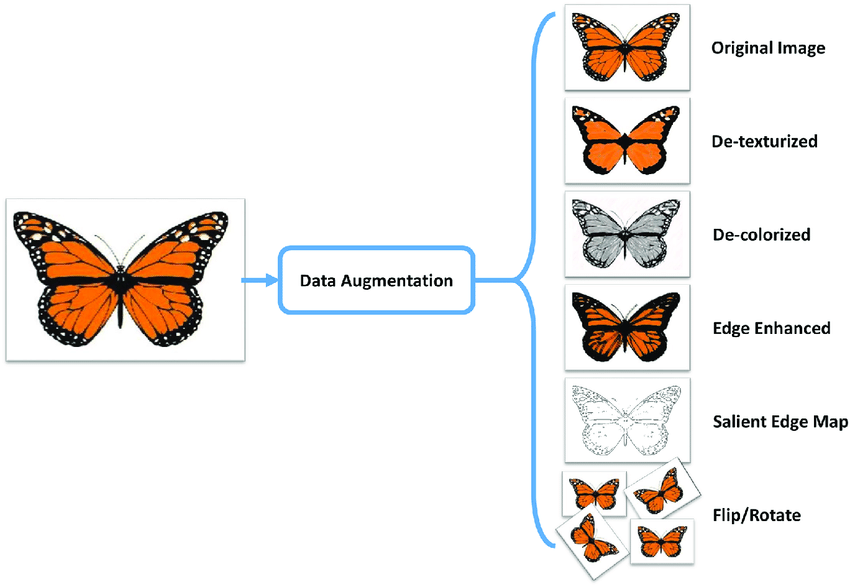

In [35]:
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
K.set_value(model.optimizer.learning_rate, 0.01)


# performing data argumentation by training image generator
dataAugmentaion = ImageDataGenerator(rotation_range = 20,
                                     zoom_range = 0.20, 
                                     fill_mode = "nearest",
                                     shear_range = 0.20,
                                     horizontal_flip = True, 
                                     width_shift_range = 0.15,
                                     height_shift_range = 0.15)

# training the model
history = model.fit_generator(dataAugmentaion.flow(X_train, y_train, batch_size = 32),
                    validation_data = (X_test, y_test),
                    steps_per_epoch = len(X_train) // 32,
                    epochs = 40)

Epoch 1/40
1009/1009 [==============================] - 45s 45ms/step - loss: 1.9399 - accuracy: 0.1944 - val_loss: 1.9505 - val_accuracy: 0.2031
Epoch 2/40
1009/1009 [==============================] - 47s 46ms/step - loss: 1.8626 - accuracy: 0.2441 - val_loss: 1.7715 - val_accuracy: 0.3043
Epoch 3/40
1009/1009 [==============================] - 47s 46ms/step - loss: 1.7768 - accuracy: 0.2963 - val_loss: 1.7090 - val_accuracy: 0.3539
Epoch 4/40
1009/1009 [==============================] - 47s 46ms/step - loss: 1.6871 - accuracy: 0.3460 - val_loss: 1.6258 - val_accuracy: 0.3781
Epoch 5/40
1009/1009 [==============================] - 47s 47ms/step - loss: 1.5889 - accuracy: 0.3890 - val_loss: 1.4326 - val_accuracy: 0.4511
Epoch 6/40
1009/1009 [==============================] - 47s 46ms/step - loss: 1.5065 - accuracy: 0.4235 - val_loss: 1.4356 - val_accuracy: 0.4461
Epoch 7/40
1009/1009 [==============================] - 46s 46ms/step - loss: 1.4428 - accuracy: 0.4501 - val_loss: 1.3006 -

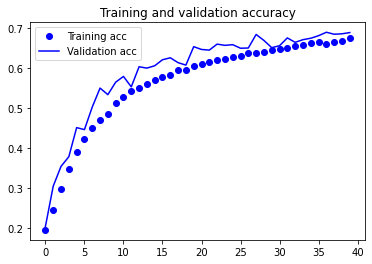

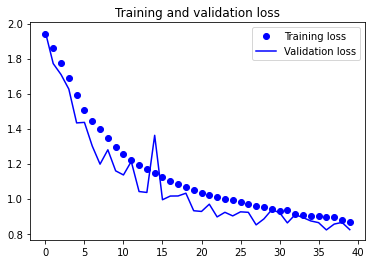

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

(48, 48)
[[0.1442707  0.00535465 0.28607047 0.0141468  0.06970832 0.42134684
  0.05910228]]
[5]
Surprise


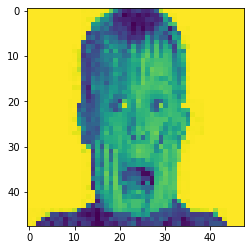

In [42]:
from keras.preprocessing import image
from matplotlib.pyplot import imshow
import numpy as np
%matplotlib inline

img_path = 'test.jpg'

img = image.load_img(img_path, target_size=(48, 48), color_mode='grayscale')
print(np.shape(img))
imshow(img)
x = image.img_to_array(img)
x /= 255.
x = np.expand_dims(x, axis=0)
print(model.predict(x))
print(model.predict_classes(x))
print(label_map[int(model.predict_classes(x))])

(48, 48)
[[7.6006748e-02 1.7694275e-07 5.2803445e-01 9.7346894e-02 2.6797709e-01
  1.2407438e-02 1.8227272e-02]]
[2]
Fear


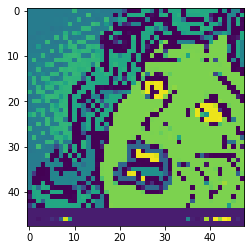

In [43]:
from keras.preprocessing import image
from matplotlib.pyplot import imshow
import numpy as np
%matplotlib inline

img_path = 'test1.jpg'

img = image.load_img(img_path, target_size=(48, 48), color_mode='grayscale')
print(np.shape(img))
imshow(img)
x = image.img_to_array(img)
x /= 255.
x = np.expand_dims(x, axis=0)
print(model.predict(x))
print(model.predict_classes(x))
print(label_map[int(model.predict_classes(x))])

(48, 48)
[[2.2443008e-02 3.2567671e-06 2.9163444e-01 5.9905749e-02 1.5025908e-01
  3.1408820e-01 1.6166624e-01]]
[5]
Surprise


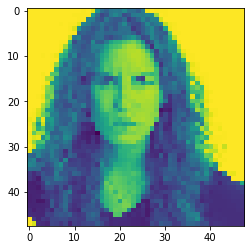

In [45]:
from keras.preprocessing import image
from matplotlib.pyplot import imshow
import numpy as np
%matplotlib inline

img_path = 'test2.jpg'

img = image.load_img(img_path, target_size=(48, 48), color_mode='grayscale')
print(np.shape(img))
imshow(img)
x = image.img_to_array(img)
x /= 255.
x = np.expand_dims(x, axis=0)
print(model.predict(x))
print(model.predict_classes(x))
print(label_map[int(model.predict_classes(x))])

(48, 48)
[[7.4637562e-01 4.0246182e-06 4.3239884e-02 6.5579548e-02 5.5047669e-02
  4.3848376e-03 8.5368425e-02]]
[0]
Anger


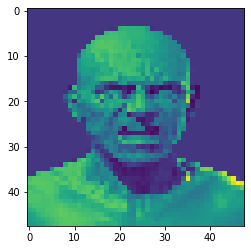

In [49]:
from keras.preprocessing import image
from matplotlib.pyplot import imshow
import numpy as np
%matplotlib inline

img_path = 'test3.jpg'

img = image.load_img(img_path, target_size=(48, 48), color_mode='grayscale')
print(np.shape(img))
imshow(img)
x = image.img_to_array(img)
x /= 255.
x = np.expand_dims(x, axis=0)
print(model.predict(x))
print(model.predict_classes(x))
print(label_map[int(model.predict_classes(x))])